In [346]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
import time
import re
import genius_keys
% matplotlib inline
import matplotlib.pyplot as plt
import cycler

In [267]:
driver = webdriver.Chrome()

In [268]:
driver.get('https://genius.com/#top-songs')
time.sleep(2) #give site time to load
all_time = driver.find_element_by_xpath('//*[@id="top-songs"]/div/home-charts-tabs/div/div/span[4]')
all_time.click()
time.sleep(2) #give site time to load
margin = driver.find_element_by_tag_name('show-more')

n = 0
while n < 10:
    margin.click()
    time.sleep(2)
    margin = driver.find_element_by_tag_name('show-more')
    n = n + 1

top100 = driver.find_elements_by_tag_name('transclude-injecting-local-scope')
artist_list = []
for title in top100[:100]:
    artist_dict = {}
    values = title.text.split('\n')
    if len(values) == 4:
        artist_dict['position'] = values[0]
        artist_dict['song'] = values[1]
        artist_dict['artist'] = values[2]
        artist_dict['views'] = values[3]
        artist_list.append(artist_dict)
    if len(values) == 3:
        artist_dict['position'] = values[0]
        split = values[1].split(' by ')
        artist_dict['song'] = split[0]
        artist_dict['artist'] = split[1]
        artist_dict['views'] = values[2]
        artist_list.append(artist_dict)

[{'position': '1',
  'song': 'Despacito (Remix)',
  'artist': 'Luis Fonsi & Daddy Yankee',
  'views': '22.1M'},
 {'position': '2',
  'song': 'Shape of You',
  'artist': 'Ed Sheeran',
  'views': '13.2M'},
 {'position': '3', 'song': 'Rap God', 'artist': 'Eminem', 'views': '12.6M'},
 {'position': '4',
  'song': 'HUMBLE.',
  'artist': 'Kendrick Lamar',
  'views': '9.6M'},
 {'position': '5',
  'song': "Man's Not Hot",
  'artist': 'Big Shaq',
  'views': '8.1M'},
 {'position': '6',
  'song': 'Bad and Boujee',
  'artist': 'Migos',
  'views': '7.9M'},
 {'position': '7',
  'song': 'Drunk in Love',
  'artist': 'Beyoncé',
  'views': '7.7M'},
 {'position': '8',
  'song': 'The Hills',
  'artist': 'The Weeknd',
  'views': '7.6M'},
 {'position': '9', 'song': 'Work', 'artist': 'Rihanna', 'views': '7.4M'},
 {'position': '10', 'song': "God's Plan", 'artist': 'Drake', 'views': '7.4M'},
 {'position': '11',
  'song': "Fuckin' Problems",
  'artist': 'A$AP Rocky',
  'views': '7.1M'},
 {'position': '12',
  'so

In [307]:
df = pd.DataFrame(artist_list)
df['views'] = df['views'].str.replace('M', '')
df['views'] = df['views'].astype(float)
df.head()

,artist,position,song,views
0,Luis Fonsi & Daddy Yankee,1,Despacito (Remix),22.1
1,Ed Sheeran,2,Shape of You,13.2
2,Eminem,3,Rap God,12.6
3,Kendrick Lamar,4,HUMBLE.,9.6
4,Big Shaq,5,Man's Not Hot,8.1


In [362]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,

    'figure.facecolor': '#000000',
    
### AXES
    'axes.facecolor': '#000000',
    'axes.edgecolor': '#000000',
    'axes.grid.axis': 'y',
    'axes.linewidth': 0.8,
    'axes.grid': True,
    'axes.titlesize': 'medium',
    'axes.labelweight': 'normal',  # weight of the x and y labels
    'axes.labelcolor': 'black',
    'axes.axisbelow': 'line',
    "axes.spines.left" : False,
    "axes.spines.right" : False,
    "axes.spines.top" : False,
    'axes.axisbelow': True,
#    'axes.prop_cycle': cycler('color', ['#673AB7', '#80DEEA', '#FFD600', '#FF9E80', '#CCFF90', '#8c564b', 
#                                        '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']),
#axes.xmargin        : .05  # x margin.  See `axes.Axes.margins`
#axes.ymargin        : .05  # y margin See `axes.Axes.margins`

## LINES
    'lines.linewidth': 1.5,
    'lines.linestyle': '-',

## LEGEND
   'legend.frameon': True,     
    'legend.framealpha': 0.8,   
    'legend.facecolor': 'inherit',
    #'legend.edgecolor': 0.8,     
    'legend.fancybox': True,     

## FONT
    'font.family': 'sans-serif',
    'font.style': 'normal',
    'font.variant': 'normal',
    'font.weight': 'medium',
    'font.stretch': 'normal',
    'font.size': 19,
    
## GRID
    'grid.color': '#FFFD7D',
    "grid.linewidth": 0.4,
    'grid.linestyle': '-.',
    'grid.alpha': 1.0,
    
    
## TICKS
    'xtick.bottom': False,
    'xtick.color': '#FFFD7D',
    'xtick.direction': 'in',
    'xtick.labelbottom': True,
    'xtick.labelsize': 'medium',
#    'xtick.labeltop': False,
#    'xtick.major.bottom': True,
    'xtick.major.pad': 3.5,
#    'xtick.major.size': 3.0,
#    'xtick.major.top': True,
    'xtick.major.width': 1,
#    'xtick.minor.bottom': True,
#    'xtick.minor.pad': 3.4,
#    'xtick.minor.size': 2.0,
#    'xtick.minor.top': True,
#    'xtick.minor.visible': False,
#    'xtick.minor.width': 0.6,
#    'xtick.top': False,
#    'ytick.alignment': 'center_baseline',
   'ytick.color': '#FFFD7D',
#    'ytick.direction': 'in',
    'ytick.labelleft': True,
#    'ytick.labelright': False,
#    'ytick.labelsize': 'medium',
    'ytick.left': False,
#    'ytick.major.left': True,
#    'ytick.major.pad': 3.5,
#    'ytick.major.right': True,
#    'ytick.major.size': 0.0,
#    'ytick.major.width': 0.8,
#    'ytick.minor.left': True,
#    'ytick.minor.pad': 3.4,
#    'ytick.minor.right': True,
#    'ytick.minor.size': 0.0,
#    'ytick.minor.visible': False,
#    'ytick.minor.width': 0.6,
#    'ytick.right': False
})

In [358]:
#def get_color(artist):
#    if artist > 9:
#        return '#673AB7'
#    else:
#        return '#7f7f7f'
#bar_colors = [get_color(artist) for artist in top_artists]

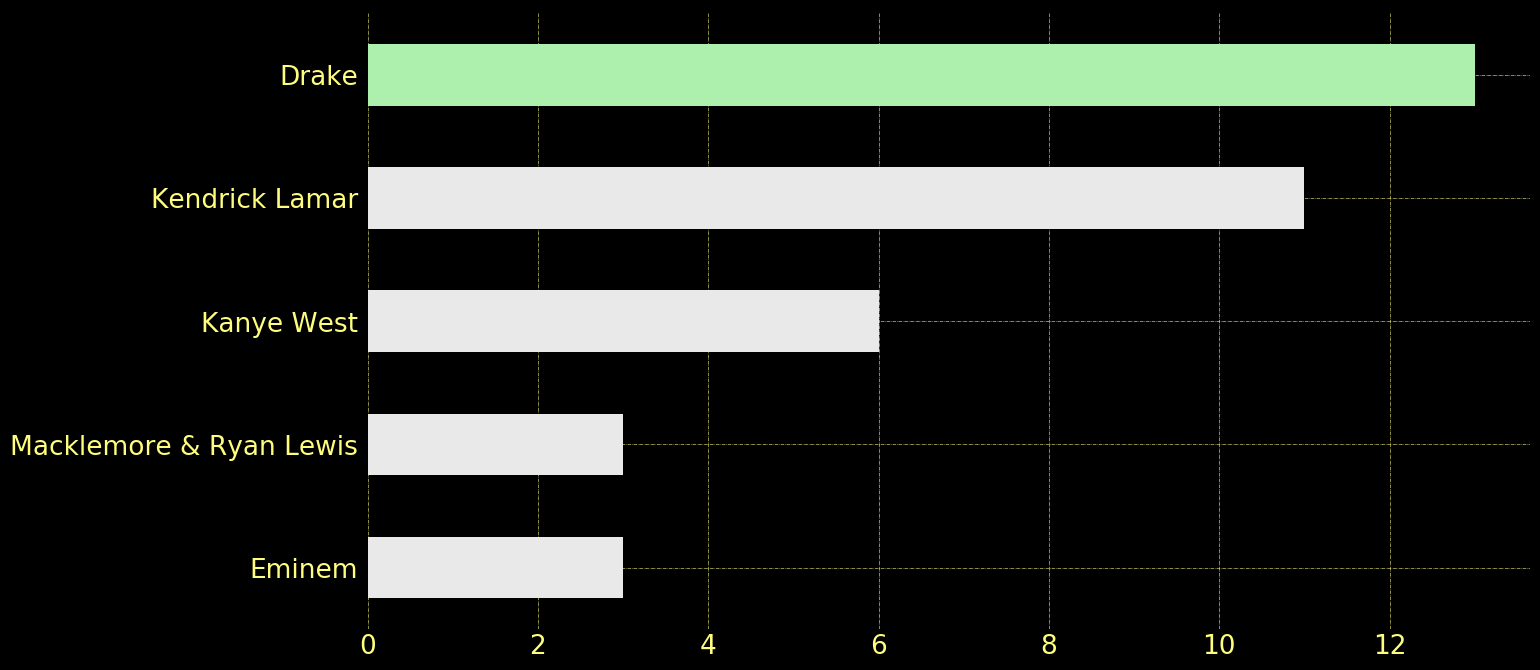

In [369]:
top_artists = df.artist.value_counts().head()
top_artists.sort_values(ascending=True).plot(kind='barh', color=['#E9E9E9', '#E9E9E9', '#E9E9E9', '#E9E9E9', '#ADEFAC'], figsize=(15,8))

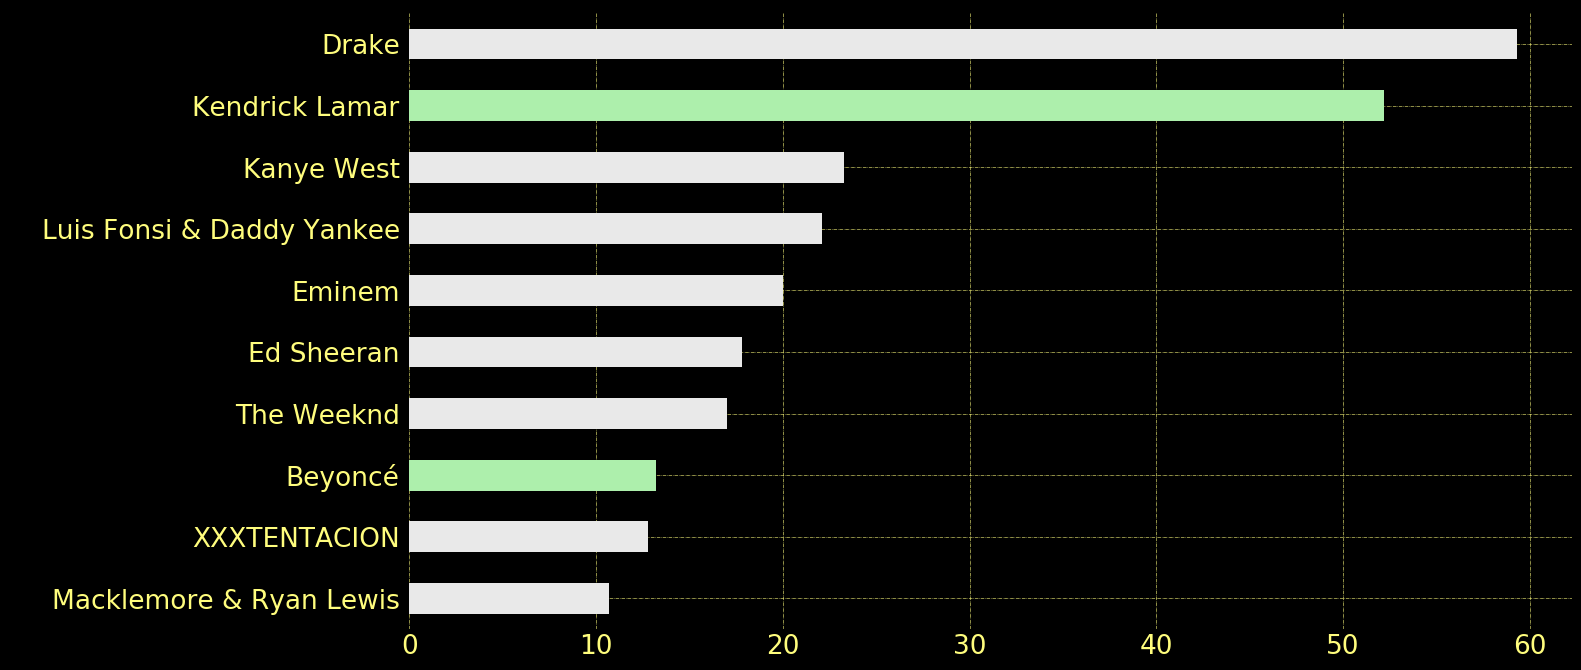

In [373]:
all_views = df.groupby('artist').views.sum().sort_values(ascending=False)
all_views.head(10).sort_values(ascending=True).plot(kind='barh', color=['#E9E9E9', '#E9E9E9','#ADEFAC', '#E9E9E9', '#E9E9E9',], figsize=(15,8))

In [3]:
base_url = 'https://api.genius.com/'
songs = 'songs/'

In [4]:
params={
'genius_client_id' : client_id,
'genius_secret_id' : client_secret,
'genius_client_access_token' : access_token}

In [5]:
# Passing in like a gazillion headers but I think the main point was the cookie. So if mine doesn't work pass in yours
headers = {
#    "User-Agent": "CompuServe Classic/1.22",
#    "scheme": "https",
#    'authority': 'genius.com',
    "Host":"api.genius.com",
    'Authorization': 'Bearer HERE SHOULD BE YOUR ACCESS TOKEN'
}

In [6]:
song_id = 'XXXX'

In [ ]:
genius_url = base_url+songs+song_id
response = requests.get(genius_url, headers=headers)
genius = response.json()
genius